In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline

In [2]:
accuracy_table, progress_table = {}, {}
for n_layers in (3,):
    accuracy_table[n_layers], progress_table[n_layers] = \
        pickle.load(open('info/cifar-lstm-memory-network-%d' % n_layers, 'rb'))
baseline_accuracy, baseline_progress = \
    pickle.load(open('info/triple-state-normal-residual-network-%d' % n_layers))

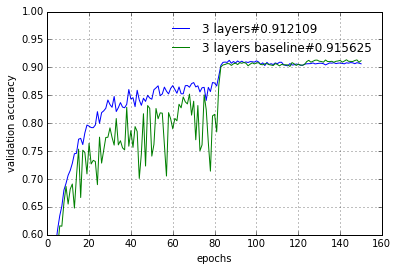

In [3]:
for key, value in sorted(accuracy_table.items()):
    progress = progress_table[key]
    validation_accuracy = progress['validation_accuracy']
    label = '%d layers#%f' % (key, value)
    pl.plot(range(len(validation_accuracy)), validation_accuracy, label=label)
    validation_accuracy = baseline_progress['validation_accuracy']
    label = '%d layers baseline#%f' % (key, baseline_accuracy)
    pl.plot(range(len(validation_accuracy)), validation_accuracy, label=label)
pl.legend(framealpha=0, loc=0)
pl.grid()
pl.ylim(0.6, 1)
pl.xlabel('epochs')
pl.ylabel('validation accuracy')

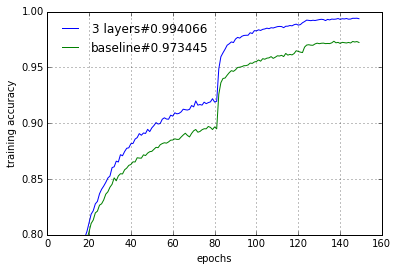

In [4]:
for key, value in sorted(accuracy_table.items()):
    progress = progress_table[key]
    training_accuracy = progress['training_accuracy']
    label = '%d layers#%f' % (key, max(training_accuracy))
    pl.plot(range(len(training_accuracy)), training_accuracy, label=label)
training_accuracy = baseline_progress['training_accuracy']
pl.plot(range(len(training_accuracy)), training_accuracy, label='baseline#%f' % max(training_accuracy))
pl.legend(framealpha=0, loc=0)
pl.grid()
pl.ylim(0.8, 1)
pl.xlabel('epochs')
pl.ylabel('training accuracy')

In [5]:
def count_parameters(parameters):
    from operator import mul
    n_parameters = 0
    for key, value in parameters.items():
        n_parameters += reduce(mul, value.shape)
    return n_parameters

In [6]:
n_layers = 3
parameters, states = pickle.load(open('parameters/cifar-lstm-memory-network-%d' % n_layers, 'rb'))
print 'lstm memory', count_parameters(parameters), count_parameters(states)
parameters, states = pickle.load(open('parameters/triple-state-normal-residual-network-%d' % n_layers, 'rb'))
print 'baseline', count_parameters(parameters), count_parameters(states)

lstm memory 693584 13990
baseline 270410 1376
